In [81]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [211]:
pop_df = pd.read_csv("./West Coast 2023 Datasets/Traffic, Investigations _ Other/philadelphia_population_metrics.csv")

In [212]:
pop_df = pop_df.dropna(axis=0, how="any")
pop_df = pop_df.rename(columns={'GEOGRAPHY_NAME': "fips", 'COUNT_ALL_RACES_ETHNICITIES': 'count', 
                        "COUNT_WHITE_NH": "White - Non-Latino Count", "COUNT_BLACK_NH": "Black - Non-Latino Count",
                       "COUNT_ASIAN_NH": 'Asian Count', "COUNT_HISPANIC": 'Latino Count',
                               "PERCENT_WHITE_NH": "White - Non-Latino", "PERCENT_BLACK_NH": "Black - Non-Latino",
                               "PERCENT_ASIAN_NH": "Asian", "PERCENT_HISPANIC": "Latino"})

#pop_df.pivot(index="fips",columns="Race Percentage",values=["White - Non-Latino","Black - Non-Latino", "Asian", "Latino"])
pop_df = pop_df.drop(["OBJECTID", "GEOGRAPHY", "Shape__Area", "Shape__Length"
                     # 'Asian Count', 'Latino Count', "White - Non-Latino Count", "Black - Non-Latino Count"
                     ], axis=1)
pop_df2 = pd.melt(pop_df, id_vars=["fips"], value_vars=["Asian", "Latino", "White - Non-Latino", "Black - Non-Latino"])
print(pop_df)
pop_df2

            fips  count  White - Non-Latino Count  Black - Non-Latino Count  \
0    42101000100   3478                      2890                       207   
1    42101000200   2937                       665                       284   
2    42101000300   3169                      2290                       324   
3    42101000401   2125                      1049                       376   
4    42101000402   3142                      2455                       173   
..           ...    ...                       ...                       ...   
376  42101980300      2                         2                         0   
380  42101980700      5                         0                         3   
381  42101980800      6                         4                         1   
382  42101980900     30                         9                        18   
383  42101989100   7765                       975                      5469   

     Asian Count  Latino Count  White - Non-Latino 

,fips,variable,value
0,42101000100,Asian,4.974123
1,42101000200,Asian,63.159687
2,42101000300,Asian,10.350268
3,42101000401,Asian,24.423529
4,42101000402,Asian,11.330363
...,...,...,...
1519,42101980300,Black - Non-Latino,0.000000
1520,42101980700,Black - Non-Latino,60.000000
1521,42101980800,Black - Non-Latino,16.666667
1522,42101980900,Black - Non-Latino,60.000000


In [186]:
pop_df

,fips,count,White - Non-Latino Count,Black - Non-Latino Count,Asian Count,Latino Count,White - Non-Latino,Black - Non-Latino,Asian,Latino
0,42101000100,3478,2890,207,173,126,83.093732,5.951696,4.974123,3.622772
1,42101000200,2937,665,284,1855,79,22.642152,9.669731,63.159687,2.689820
2,42101000300,3169,2290,324,328,135,72.262543,10.224045,10.350268,4.260019
3,42101000401,2125,1049,376,519,107,49.364706,17.694118,24.423529,5.035294
4,42101000402,3142,2455,173,356,109,78.134946,5.506047,11.330363,3.469128
...,...,...,...,...,...,...,...,...,...,...
376,42101980300,2,2,0,0,0,100.000000,0.000000,0.000000,0.000000
380,42101980700,5,0,3,1,1,0.000000,60.000000,20.000000,20.000000
381,42101980800,6,4,1,0,0,66.666667,16.666667,0.000000,0.000000
382,42101980900,30,9,18,0,2,30.000000,60.000000,0.000000,6.666667


In [57]:
districts = pd.read_csv("./West Coast 2023 Datasets/Traffic, Investigations _ Other/traffic_stops_philadelphia.csv")
districts = districts.dropna(axis=0, how="any")
districts["fips"] = districts["fips"].astype("float").astype("int64")
districts = districts[["fips", "district"]]
districts = districts.drop_duplicates()
districts

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,fips,district
36,421010096004,19.0
46,421010084004,18.0
84,421010064003,12.0
144,421010093004,19.0
157,421010095001,19.0
...,...,...
1819267,420912000000,19.0
1842039,421010168006,39.0
1846190,420912000000,2.0
1862241,421010267006,26.0


In [58]:
inv_df = pd.read_csv("./West Coast 2023 Datasets/Traffic, Investigations _ Other/investigations.csv")
len(inv_df)

2785087

In [59]:
inv_df["fips"] = inv_df["fips"].astype('Int64')
inv_df = inv_df.dropna(axis=0, how="any")
inv_df = pd.merge(inv_df, districts, how="left", on="fips")
inv_df = inv_df.dropna(axis=0, how="any")

In [60]:
inv_df.head(1)

,id,datetimeoccur,weekday,location,districtoccur,psa,stoptype,inside_or_outside,gender,race,...,individual_searched,individual_arrested,individual_contraband,vehicle_frisked,vehicle_searched,vehicle_contraband,lat,lng,fips,district
0,1767776,2014-05-14 00:00:00+00,TUESDAY,300 BLOCK S 13TH ST,6,3,pedestrian,Outside,Male,Black - Non-Latino,...,0,0,0,0,0,0,39.946671,-75.162656,421010011014,3.0


In [61]:
inv_df["year"] = pd.DatetimeIndex(inv_df['datetimeoccur']).year

In [62]:
inv_groups = inv_df.groupby(["district", "year", "individual_arrested"]).size().reset_index(name="counts")
#inv_df.groupby(["fips", "year", "race"])
# pd.pivot_table(inv_df, index = ["fips", "year"], columns = "race", aggfun=np.count)

In [63]:
inv_year_count = inv_df.groupby(["district", "year"]).size().reset_index(name="counts")


In [64]:
print(inv_groups)
print(inv_year_count)

     district  year  individual_arrested  counts
0         1.0  2014                    0   30102
1         1.0  2014                    1    1412
2         1.0  2015                    0   42546
3         1.0  2015                    1    1869
4         1.0  2016                    0   32752
..        ...   ...                  ...     ...
435      77.0  2021                    1      22
436      77.0  2022                    0     430
437      77.0  2022                    1      30
438      77.0  2023                    0      94
439      77.0  2023                    1       7

[440 rows x 4 columns]
     district  year  counts
0         1.0  2014   31514
1         1.0  2015   44415
2         1.0  2016   34437
3         1.0  2017   37828
4         1.0  2018   40984
..        ...   ...     ...
215      77.0  2019     969
216      77.0  2020     198
217      77.0  2021     477
218      77.0  2022     460
219      77.0  2023     101

[220 rows x 3 columns]


In [65]:
inv_groups["percentage"] = inv_groups.apply(lambda row: float(row["counts"] / 
                                                              inv_year_count.loc[(inv_year_count['year'] == row["year"])& (inv_year_count['district'] == row["district"])]["counts"] * 100)
                                                              , axis=1).T
                               #             (row["counts"] / 
                                          #  inv_year_count.loc[(inv_year_count['year'] == row["year"]) 
                                          #                     & (inv_year_count['fips'] == row["fips"])]["counts"]), axis=1).T

In [66]:
inv_year_count = inv_year_count[inv_year_count["counts"] > 10]


In [67]:
inv_all_percentage = pd.merge(inv_year_count, inv_groups, on=["district", "year"], how="left")

In [68]:
inv_all_percentage

,district,year,counts_x,individual_arrested,counts_y,percentage
0,1.0,2014,31514,0,30102,95.519452
1,1.0,2014,31514,1,1412,4.480548
2,1.0,2015,44415,0,42546,95.791962
3,1.0,2015,44415,1,1869,4.208038
4,1.0,2016,34437,0,32752,95.107007
...,...,...,...,...,...,...
435,77.0,2021,477,1,22,4.612159
436,77.0,2022,460,0,430,93.478261
437,77.0,2022,460,1,30,6.521739
438,77.0,2023,101,0,94,93.069307


In [69]:
inv_all_percentage = inv_all_percentage[inv_all_percentage["individual_arrested"] == 1]

In [70]:
inv_all_percentage

,district,year,counts_x,individual_arrested,counts_y,percentage
1,1.0,2014,31514,1,1412,4.480548
3,1.0,2015,44415,1,1869,4.208038
5,1.0,2016,34437,1,1685,4.892993
7,1.0,2017,37828,1,1722,4.552184
9,1.0,2018,40984,1,1609,3.925922
...,...,...,...,...,...,...
431,77.0,2019,969,1,30,3.095975
433,77.0,2020,198,1,15,7.575758
435,77.0,2021,477,1,22,4.612159
437,77.0,2022,460,1,30,6.521739


In [71]:
inv_all_percentage = inv_all_percentage.rename(columns={"counts_x": "Total Investigations", "counts_y": "Arrests Made"})


In [115]:
inv_avg_percentage = inv_all_percentage.groupby(["year"]).mean()
inv_avg_percentage = inv_avg_percentage.drop(["district"], axis=1)
inv_avg_percentage = inv_avg_percentage.reset_index()
inv_avg_percentage

,year,index,Total Investigations,Arrests Made,percentage
0,2014,211.0,33679.772727,1943.636364,5.568892
1,2015,213.0,47499.909091,2517.500000,5.343326
2,2016,215.0,42126.045455,2127.818182,5.061369
3,2017,217.0,45364.454545,2176.272727,4.729241
4,2018,219.0,44066.772727,1924.772727,4.362403
5,2019,221.0,57117.454545,2276.772727,3.893001
6,2020,223.0,8548.363636,575.045455,7.009154
7,2021,225.0,15759.090909,1067.272727,7.214850
8,2022,227.0,12988.545455,896.136364,7.217957
9,2023,229.0,2104.090909,136.318182,6.355165


In [72]:
inv_all_percentage = inv_all_percentage.drop(["individual_arrested"], axis=1)

In [114]:
inv_all_percentage = inv_all_percentage.sort_values(by="percentage")
inv_all_percentage = inv_all_percentage

In [101]:

inv_district_seven = inv_all_percentage[inv_all_percentage["district"] == 7.0]
inv_district_seven = inv_district_seven.sort_values(by="year")
inv_district_seven["percentage"]
inv_district_eight = inv_all_percentage[inv_all_percentage["district"] == 8.0]
inv_district_eight = inv_district_eight.sort_values(by="year")
inv_district_five = inv_all_percentage[inv_all_percentage["district"] == 5.0]
inv_district_five = inv_district_five.sort_values(by="year")

<AxesSubplot:xlabel='year'>

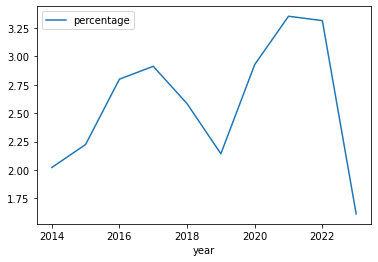

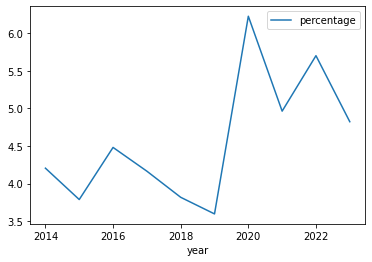

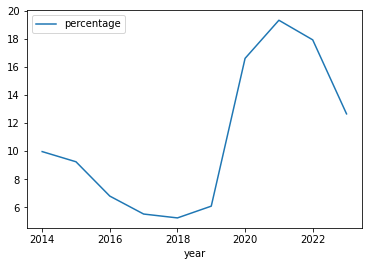

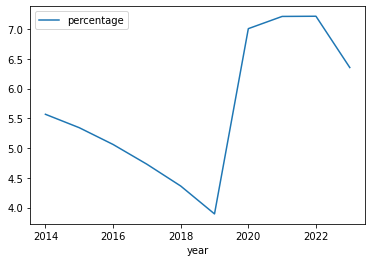

In [116]:
inv_district_seven[["year", "percentage"]]
# years = range(2014, 2023)
# fig, ax = plt.subplots(figsize=(10, 10))
# ax.bar(years, inv_district_seven[["year", "percentage"]])
# plt.show()
inv_district_seven.plot.line(x="year", y=["percentage"], subplots=True)
inv_district_eight.plot.line(x="year", y=["percentage"], subplots=True)
inv_district_five.plot.line(x="year", y=["percentage"], subplots=True)
inv_avg_percentage.plot.line(x="year", y=["percentage"])

In [74]:
inv_all_percentage.to_csv("./cleaned/inv_to_arrest_by_district.csv")